# Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

## Task: 
To perform descriptive analytics, visualize data distributions, and preprocess the dataset for further analysis.


### Import Libraries & Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("./sales_data_with_discounts.csv") 
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


### Descriptive Analytics for Numerical Columns

In [3]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


### Interpretation:

Mean: average value

Median: middle value

Mode: most frequent value

Standard Deviation: measure of spread

In [4]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols

['Volume',
 'Avg Price',
 'Total Sales Value',
 'Discount Rate (%)',
 'Discount Amount',
 'Net Sales Value']

### Calculate Mean, Median, Mode, Standard deviation

In [5]:
for col in numerical_cols:
    print(f"\n{col}")
    print(f"Mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    print(f"Mode: {df[col].mode()[0]}")
    print(f"Standard Deviation: {df[col].std()}")


Volume
Mean: 5.066666666666666
Median: 4.0
Mode: 3
Standard Deviation: 4.231602391213926

Avg Price
Mean: 10453.433333333332
Median: 1450.0
Mode: 400
Standard Deviation: 18079.90483993645

Total Sales Value
Mean: 33812.83555555555
Median: 5700.0
Mode: 24300
Standard Deviation: 50535.07417255328

Discount Rate (%)
Mean: 15.155241895330914
Median: 16.57776564929597
Mode: 5.007822189204133
Standard Deviation: 4.220602153325511

Discount Amount
Mean: 3346.499424342415
Median: 988.9337332382784
Mode: 69.17794228822787
Standard Deviation: 4509.9029633539985

Net Sales Value
Mean: 30466.336131270138
Median: 4677.788059301853
Mode: 326.97480055470817
Standard Deviation: 46358.656624066934


### Overall Insights:
The mean values are consistently higher than medians, especially for monetary columns, indicating positively skewed distributions.

High standard deviations suggest considerable spread in the data, with outliers present in pricing, total sales, discounts, and net sales.

Most transactions involve lower quantities and discounts, with occasional high-value sales significantly raising the averages.

In [6]:
df.info

<bound method DataFrame.info of            Date       Day  SKU City  Volume         BU  Brand       Model  \
0    01-04-2021  Thursday  M01    C      15    Mobiles  RealU       RU-10   
1    01-04-2021  Thursday  M02    C      10    Mobiles  RealU   RU-9 Plus   
2    01-04-2021  Thursday  M03    C       7    Mobiles   YouM       YM-99   
3    01-04-2021  Thursday  M04    C       6    Mobiles   YouM  YM-99 Plus   
4    01-04-2021  Thursday  M05    C       3    Mobiles   YouM      YM-98    
..          ...       ...  ...  ...     ...        ...    ...         ...   
445  15-04-2021  Thursday  L06    C       2  Lifestyle  Jeera   M-Casuals   
446  15-04-2021  Thursday  L07    C       6  Lifestyle   Viva   W-Western   
447  15-04-2021  Thursday  L08    C       2  Lifestyle   Viva    W-Lounge   
448  15-04-2021  Thursday  L09    C       3  Lifestyle  Jeera   M-Formals   
449  15-04-2021  Thursday  L10    C       1  Lifestyle  Jeera     M-Shoes   

     Avg Price  Total Sales Value  Discount

## Data Visualization

### Histogram plot for numerical columns

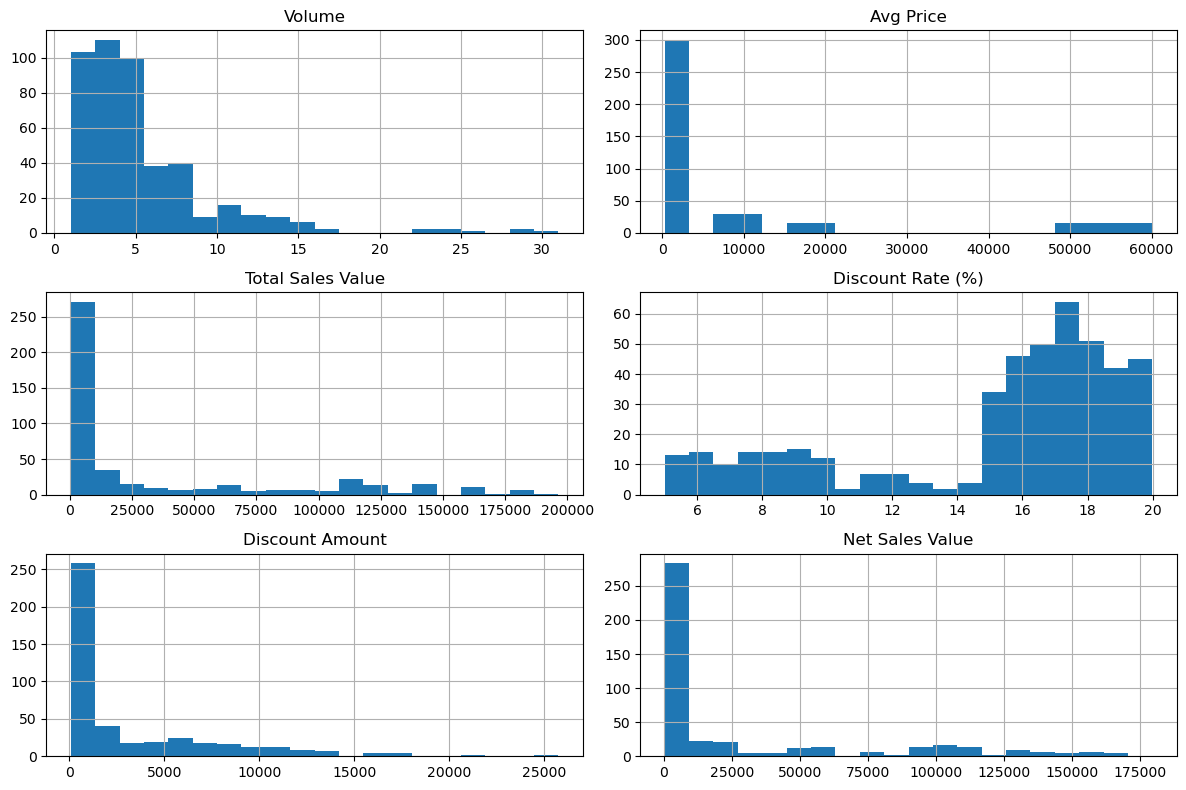

In [7]:
df[numerical_cols].hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

### Overall Observations:
All monetary columns (Avg Price, Total Sales Value, Discount Amount, Net Sales Value) show positive skewness.

Most of the business transactions are small-to-medium in value, with a few large transactions contributing to long right tails.

Volume is generally low per transaction.

Discount rates are moderately consistent, mostly between 16–18%.

### Boxplots for numerical columns

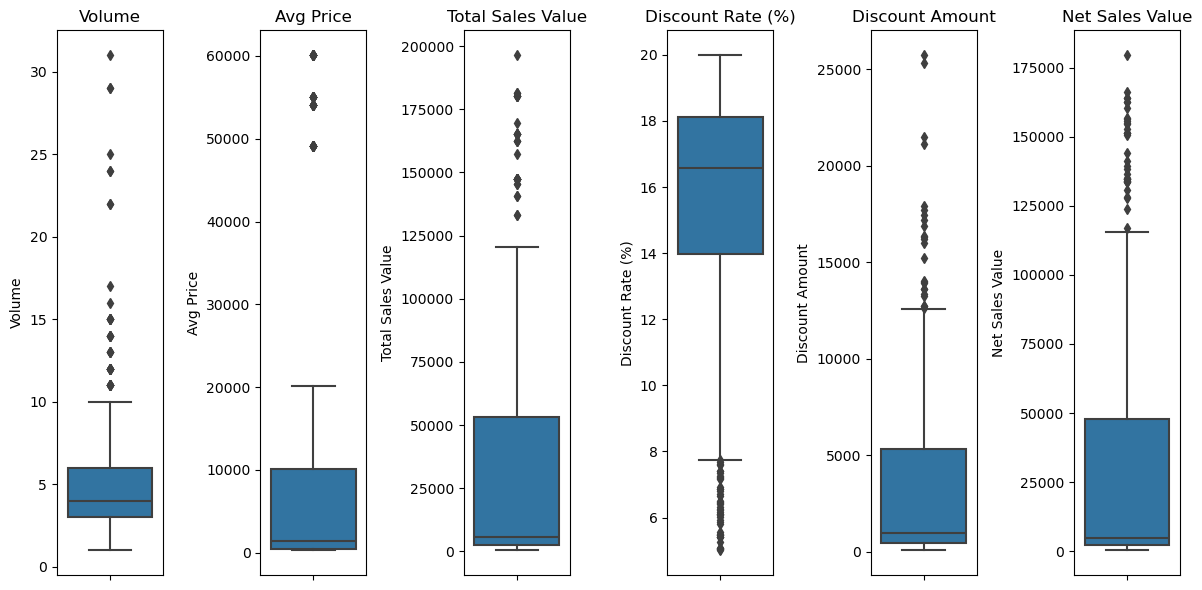

In [8]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### Overall Observation:
The monetary variables (Avg Price, Total Sales Value, Discount Amount, Net Sales Value) display positive skewness with extreme outliers.

Volume per transaction is generally low.

Discount rates are fairly stable across transactions.

Outliers are common, especially in sales and pricing data, which is typical in retail/sales datasets.

### Bar Charts for Categorical Columns

In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

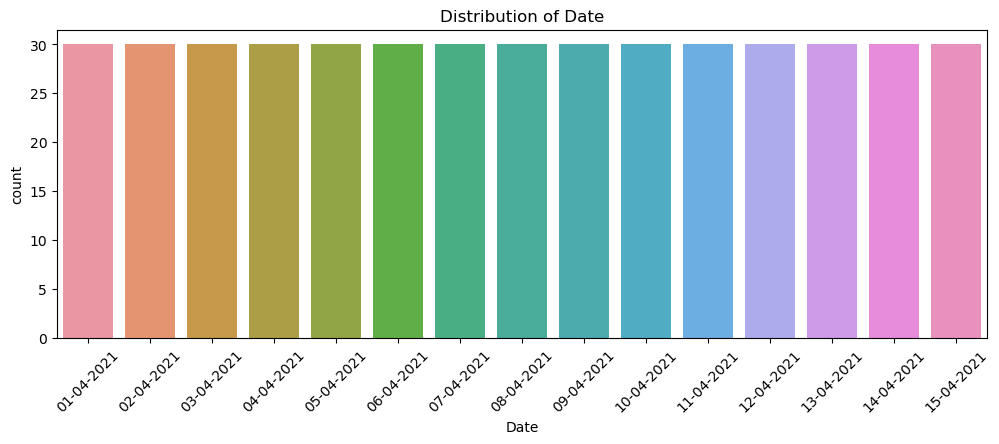

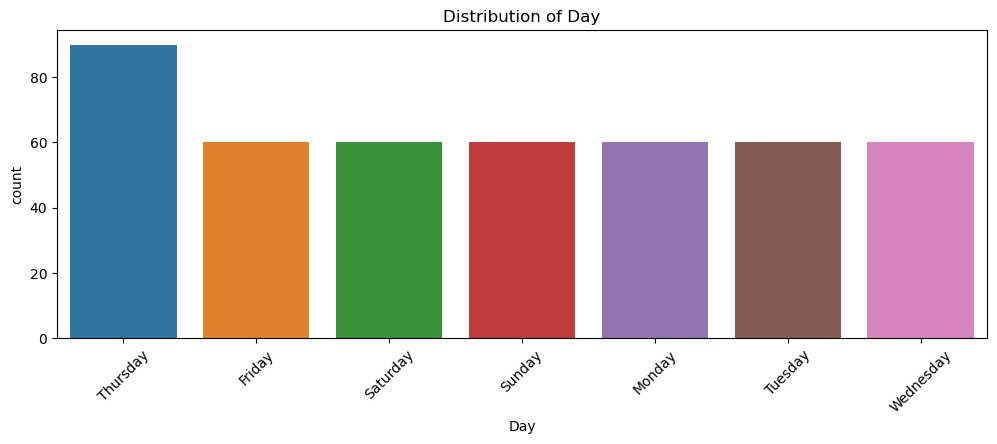

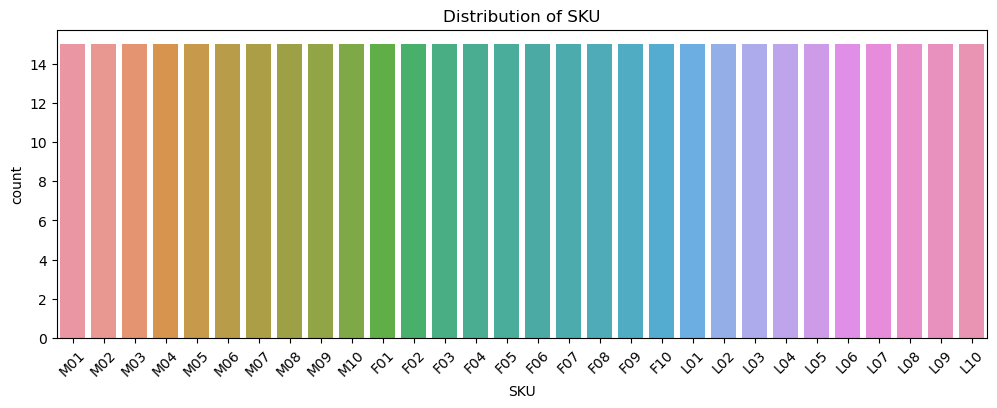

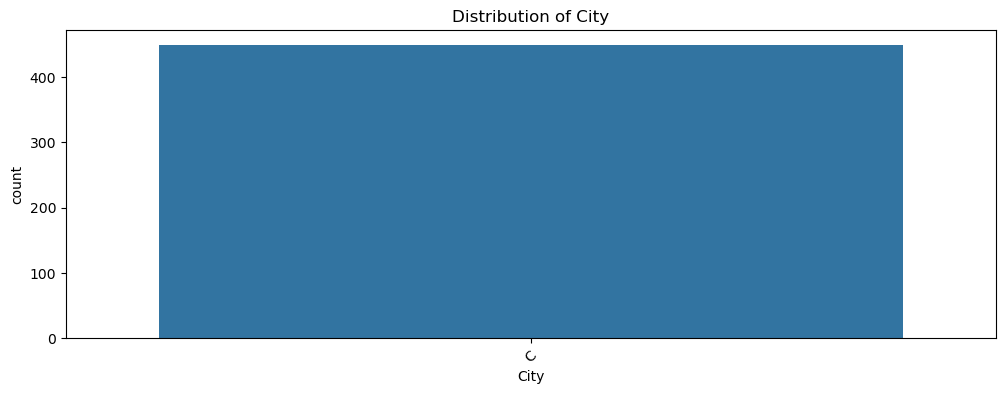

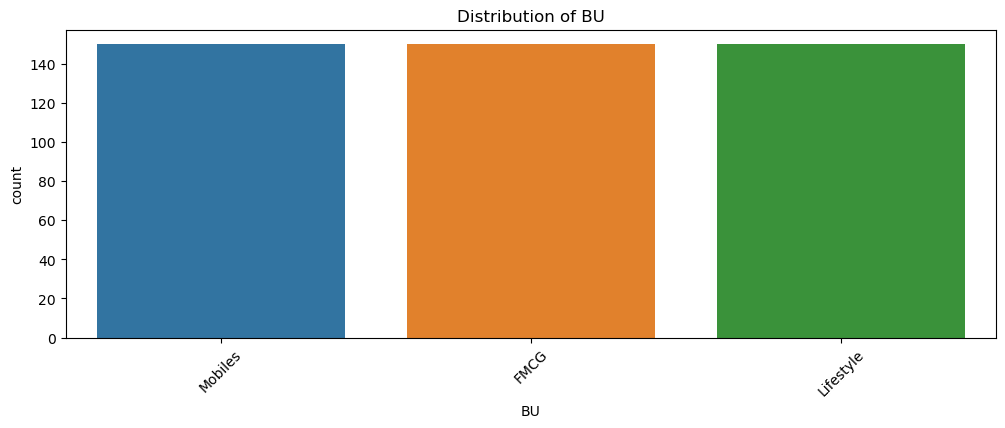

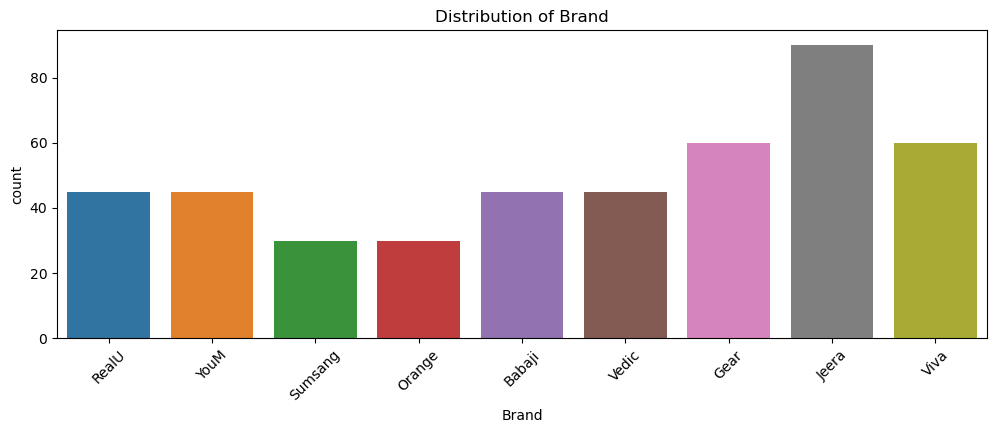

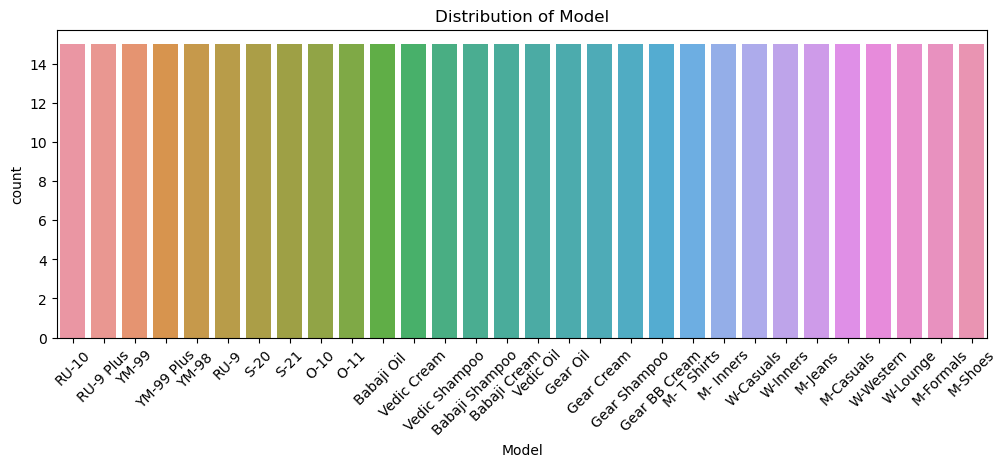

In [10]:
for col in categorical_cols:
    plt.figure(figsize=(12, 4))
    sns.countplot(x=df[col])
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

### Overall observation:
Most categorical variables like Date, SKU, BU, and Model show uniform distributions.

Brand is unevenly distributed, dominated by Jeera.

Day shows a spike on Thursday.

City is extremely imbalanced — containing only a single category ('C'), making it unsuitable for categorical analysis .

## Standardization of Numerical Variables

### Concept of Standardization (Z-Score Normalization):

Standardization is a scaling technique used to transform numerical data so that it has a mean of 0 and a standard deviation of 1. It is done using the formula:

* z= (x−μ)/σ
 
where 
x is the data value, μ is the mean, and σ is the standard deviation. This process ensures all variables are on the same scale, making them equally important in analysis and improving the performance of distance-based and gradient-based machine learning algorithms.

In [11]:
standardized_df = df.copy()

for col in numerical_cols:
    mean = df[col].mean()
    std = df[col].std()
    standardized_df[col] = (df[col] - mean) / std

standardized_df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,2.347417,Mobiles,RealU,RU-10,0.091072,2.922469,-0.829365,3.948422,2.801638
1,01-04-2021,Thursday,M02,C,1.165831,Mobiles,RealU,RU-9 Plus,-0.019548,1.329516,-0.851714,1.846958,1.269613
2,01-04-2021,Thursday,M03,C,0.456880,Mobiles,YouM,YM-99,0.312312,1.561038,-1.350129,1.621190,1.543957
3,01-04-2021,Thursday,M04,C,0.220563,Mobiles,YouM,YM-99 Plus,0.533552,1.717365,-1.947555,1.112568,1.763847
4,01-04-2021,Thursday,M05,C,-0.488389,Mobiles,YouM,YM-98,-0.130168,-0.188242,0.672990,0.227598,-0.227342


In [12]:
print("Before Standardization:")
df[numerical_cols].describe()

Before Standardization:


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [13]:
print("\nAfter Standardization:")
standardized_df[numerical_cols].describe()


After Standardization:


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02
mean,4.934325e-17,3.947460e-17,1.184238e-17,-3.552714e-17,-5.921189e-17,3.947460e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.610229e-01,-5.621398e-01,-6.611811e-01,-2.404259e+00,-7.266945e-01,-6.501345e-01
25%,-4.883887e-01,-5.524605e-01,-6.156681e-01,-2.819928e-01,-6.399340e-01,-6.096839e-01
50%,-2.520716e-01,-4.979801e-01,-5.563034e-01,3.370428e-01,-5.227531e-01,-5.562833e-01
75%,2.205626e-01,-1.954841e-02,3.836378e-01,7.011977e-01,4.368156e-01,3.749370e-01
max,6.128490e+00,2.745953e+00,3.217313e+00,1.146084e+00,4.964968e+00,3.214958e+00


## Conversion of Categorical Data into Dummy Variables

### Need for Converting Categorical Data into Dummy Variables (One-Hot Encoding):

Machine learning models require numerical inputs to perform calculations. Since categorical variables are non-numeric, they need to be converted into a numerical form. One-hot encoding transforms each category into a separate binary (0 or 1) column, ensuring the model can correctly interpret and process these variables without assuming any order or relationship between categories. This improves the model's ability to learn from the data accurately.

### One-Hot Encoding

In [14]:
encoded_df = pd.get_dummies(df, columns=categorical_cols)
encoded_df.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [15]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Columns: 101 entries, Volume to Model_YM-99 Plus
dtypes: bool(95), float64(3), int64(3)
memory usage: 63.0 KB


## Conclusion

### Summarize the key findings from the descriptive analytics and data visualizations.

Summary of Key Findings from the descriptive Analytics and Data Visualizations:

### Numerical Variables:

Volume, Avg Price, Total Sales Value, Discount Amount, and Net Sales Value showed right-skewed distributions with noticeable outliers, visible through histograms and boxplots.

Discount Rate (%) was relatively symmetric but showed a few extreme values.

### Categorical Variables:

Date, SKU, BU, and Model displayed uniform distributions, indicating equal representation across their categories.

Day column had an uneven distribution, with a higher count on Thursdays while other days were equally distributed.

City column contained only a single category, 'C', indicating no variability in city values.

Brand column showed a non-uniform distribution, with 'Jeera' being the most frequent and other brands having comparatively fewer records.


###  Reflect on the importance of data preprocessing steps like standardization and one-hot encoding in data analysis and machine learning.

Reflection on the Importance of Data Preprocessing:

### Standardization (Z-score normalization):
It is essential for numerical features, particularly when different variables have varying units and scales. Standardization transforms the data to have a mean of zero and a standard deviation of one, making it suitable for distance-based algorithms and ensuring that no feature dominates the learning process due to its scale.

### One-Hot Encoding:
It is necessary for converting categorical variables into numerical form, enabling machine learning algorithms to process them. This technique creates binary columns for each category, avoiding any unintended ordinal relationships between categories. It is particularly important when dealing with non-uniform categorical distributions, like the Brand column in this dataset, ensuring fair treatment of all categories during model training.